In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC


# Data Reading and cleaning

In [2]:
training_df = pd.read_excel('Data_User_Modeling_Dataset.xls', sheet_name=1)
testing_df = pd.read_excel('Data_User_Modeling_Dataset.xls', sheet_name=2)
training_df.drop(['Unnamed: 6','Unnamed: 7','Attribute Information:'],axis=1,inplace= True)
training_df

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle


In [3]:
testing_df.drop(['Unnamed: 6', 'Unnamed: 7','Attribute Information:'], axis=1, inplace=True)
testing_df


,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,Very Low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High
...,...,...,...,...,...,...
140,0.90,0.78,0.62,0.32,0.89,High
141,0.85,0.82,0.66,0.83,0.83,High
142,0.56,0.60,0.77,0.13,0.32,Low
143,0.66,0.68,0.81,0.57,0.57,Middle


# visualise the corelation between variables

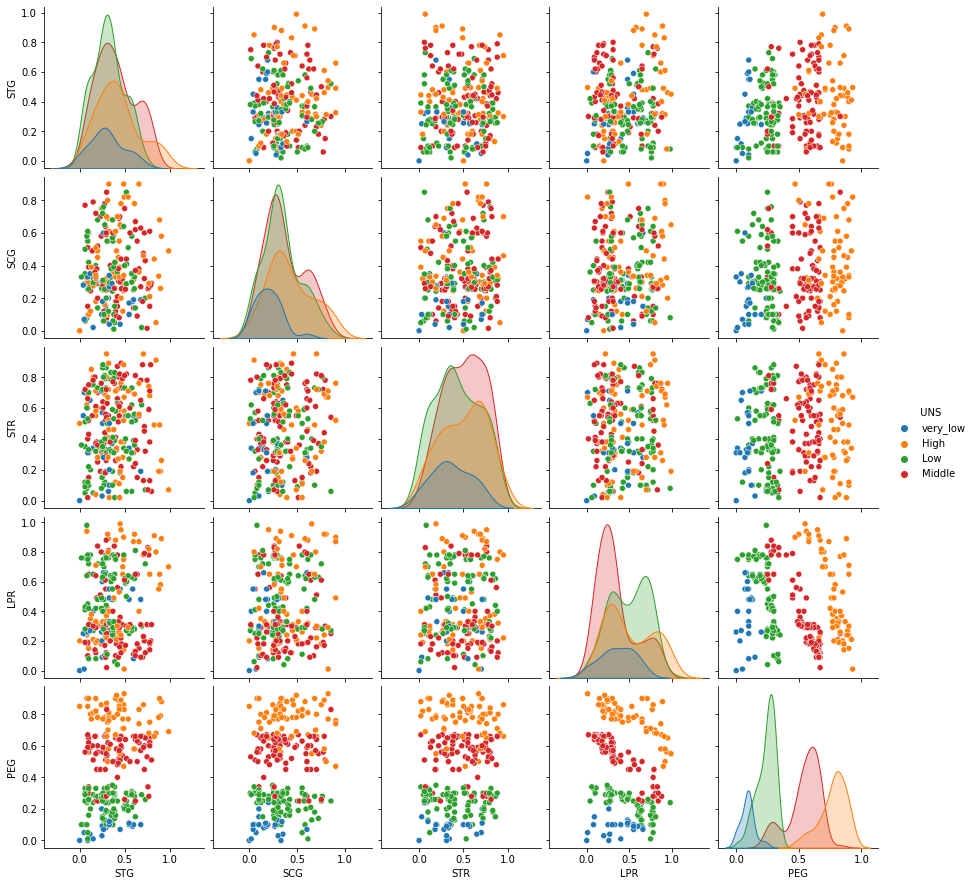

In [4]:
sns.pairplot(training_df,hue=" UNS")

<AxesSubplot:xlabel='PEG', ylabel='LPR'>

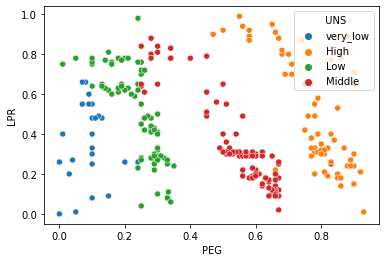

In [5]:
sns.scatterplot(x="PEG", y="LPR", data=training_df, hue=" UNS")


# features and target

In [6]:
X_train = training_df[['LPR','PEG',"STR","SCG","STG"]].to_numpy()
y_train = training_df[' UNS'].to_numpy()
y_train

array(['very_low', 'High', 'Low', 'Middle', 'Low', 'Middle', 'Middle',
       'very_low', 'Low', 'High', 'High', 'Low', 'Middle', 'High',
       'Middle', 'High', 'very_low', 'Low', 'Low', 'Middle', 'Low',
       'Middle', 'Middle', 'Low', 'Low', 'High', 'very_low', 'Low',
       'High', 'High', 'Middle', 'Low', 'Low', 'High', 'High', 'Low',
       'Low', 'Low', 'very_low', 'Middle', 'Low', 'High', 'Middle',
       'Middle', 'very_low', 'Middle', 'Middle', 'High', 'High', 'Middle',
       'Low', 'Middle', 'Low', 'High', 'Middle', 'Low', 'Middle',
       'Middle', 'High', 'Low', 'Low', 'Middle', 'Middle', 'Low',
       'Middle', 'very_low', 'very_low', 'Middle', 'Low', 'Middle',
       'Middle', 'High', 'very_low', 'Middle', 'High', 'very_low', 'Low',
       'Low', 'very_low', 'Low', 'Low', 'Middle', 'Middle', 'Low', 'Low',
       'very_low', 'High', 'Low', 'Low', 'Middle', 'Middle', 'Middle',
       'very_low', 'Low', 'High', 'Low', 'Low', 'High', 'Middle', 'Low',
       'Low', 'High',

# encoding the target col

In [7]:
y_train = LabelEncoder().fit_transform(y_train)
y_train


array([3, 0, 1, 2, 1, 2, 2, 3, 1, 0, 0, 1, 2, 0, 2, 0, 3, 1, 1, 2, 1, 2,
       2, 1, 1, 0, 3, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 3, 2, 1, 0, 2, 2,
       3, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1, 1, 2, 2, 1, 2, 3,
       3, 2, 1, 2, 2, 0, 3, 2, 0, 3, 1, 1, 3, 1, 1, 2, 2, 1, 1, 3, 0, 1,
       1, 2, 2, 2, 3, 1, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       1, 1, 0, 0, 2, 2, 3, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2,
       3, 0, 2, 2, 1, 1, 2, 1, 3, 2, 2, 1, 2, 0, 1, 3, 1, 0, 0, 1, 3, 1,
       2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 3, 0, 2, 0, 1, 0, 1, 2, 0, 1, 2, 1,
       1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 2, 0, 2, 0, 2, 1, 3, 1,
       2, 3, 3, 2, 3, 1, 0, 1, 2, 2, 3, 0, 2, 2, 0, 2, 2, 1, 1, 0, 2, 1,
       1, 2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2, 2, 1, 0,
       2, 1, 2, 0, 2, 1, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0])

# selecting the 2 best features

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k="all")
fit = bestfeatures.fit(X_train,y_train)
# Features in order ['LPR','PEG',"STR","SCG","STG"]
# so the best two are 'LPR' and 'PEG'
fit.scores_

array([ 3.43168014, 30.80616533,  1.21327794,  2.60082204,  1.46536409])

In [9]:
X_train = training_df[['LPR', 'PEG']].to_numpy()
X_test = testing_df[['LPR', 'PEG']].to_numpy()
y_test = testing_df[' UNS'].to_numpy()


In [10]:
y_test = LabelEncoder().fit_transform(y_test)
y_test


array([3, 1, 0, 0, 0, 1, 2, 1, 0, 3, 2, 3, 0, 2, 0, 3, 0, 3, 1, 2, 0, 1,
       1, 1, 2, 3, 1, 2, 2, 3, 1, 1, 2, 0, 1, 2, 1, 0, 2, 2, 3, 1, 0, 3,
       0, 3, 2, 2, 0, 3, 2, 3, 0, 3, 0, 3, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1,
       2, 1, 0, 3, 0, 3, 0, 2, 1, 0, 1, 0, 0, 2, 0, 3, 3, 1, 2, 1, 0, 3,
       1, 0, 1, 2, 1, 3, 1, 2, 0, 1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 2, 1, 0,
       1, 1, 3, 2, 2, 1, 0, 1, 2, 0, 0, 3, 1, 2, 3, 0, 1, 0, 3, 0, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2])

# SVM for classification

In [11]:
clf = SVC()
clf.fit(X_train,y_train)


SVC()

In [12]:
ypred = clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)


0.9793103448275862